In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer


In [42]:

# load data
abstracts = pd.read_csv("../00_input/IEEE_ACM_ScienceDirect_MTapplication_Papers - IEEE_ACM_ScienceDirect_MTapplication_Papers.csv", index_col=0)
abstracts.head()

,title,year,abstract,url,publisher
0,Metamorphic Testing: A Review of Challenges an...,"2018,",Metamorphic testing is an approach to both tes...,"https://doi.org/10.1145/3143561,","Association for Computing Machinery,"
1,Fault detection effectiveness of source test c...,"2018,",Metamorphic testing is a well known approach t...,"https://doi.org/10.1145/3193977.3193982,","Association for Computing Machinery,"
2,Contextual Understanding and Improvement of Me...,"2021,",Background: Metamorphic testing emerges as a s...,"https://doi.org/10.1145/3475716.3484188,","Association for Computing Machinery,"
3,A cloud-based framework for applying metamorph...,"2016,",Testing of bioinformatics software often suffe...,"https://doi.org/10.1145/2896971.2896975,","Association for Computing Machinery,"
4,"Feedback-Directed Metamorphic Testing,","2023,","Over the past decade, metamorphic testing has ...","https://doi.org/10.1145/3533314,","Association for Computing Machinery,"


In [43]:
abstracts.shape

(436, 5)

In [44]:
abstracts.isnull().sum()

title         4
year          4
abstract      4
url          16
publisher     4
dtype: int64

In [45]:
dt = abstracts[['title','year','abstract','publisher']]

In [46]:
dt = dt.dropna()
dt.isnull().sum()

title        0
year         0
abstract     0
publisher    0
dtype: int64

In [47]:
dt.shape

(432, 4)

In [49]:
abst = dt.copy()

# Step 1: Vectorize the abstracts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(abst['abstract'])

# Step 2: Create a DataFrame with TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 3: Function to get top 10 words
def top_20_words(row):
    # Get the top 10 words by TF-IDF score
    top_words = row.sort_values(ascending=False).head(20)
    return ', '.join(top_words.index)

# Step 4: Apply the function to each row of the TF-IDF DataFrame
abst['top_20_words'] = tfidf_df.apply(top_20_words, axis=1)

# Print the DataFrame with abstracts and their top 10 words
# print(df[['abstract', 'top_10_words']])
abst


,title,year,abstract,publisher,top_20_words
0,Metamorphic Testing: A Review of Challenges an...,"2018,",Metamorphic testing is an approach to both tes...,"Association for Computing Machinery,","metamorphic, relation, visions, witnessed, gen..."
1,Fault detection effectiveness of source test c...,"2018,",Metamorphic testing is a well known approach t...,"Association for Computing Machinery,","source, test, generation, cases, case, testing..."
2,Contextual Understanding and Improvement of Me...,"2021,",Background: Metamorphic testing emerges as a s...,"Association for Computing Machinery,","scientific, projects, integrating, sources, to..."
3,A cloud-based framework for applying metamorph...,"2016,",Testing of bioinformatics software often suffe...,"Association for Computing Machinery,","sequencing, resources, cloud, testing, challen..."
4,"Feedback-Directed Metamorphic Testing,","2023,","Over the past decade, metamorphic testing has ...","Association for Computing Machinery,","feedback, test, cases, metamorphic, source, co..."
...,...,...,...,...,...
431,Robustness of spectrum-based fault localisatio...,"2019,",Abstract: Most fault localisation techniques t...,ScienceDirect,"basalt, stone, brita, island, coating, aggrega..."
432,Validating class integration test order genera...,"2021,",Abstract: Context:\nPrevious studies proposed ...,ScienceDirect,NaN
433,Verification of the neural network training pr...,"2021,",Abstract: Fourier-transform infrared spectrosc...,ScienceDirect,NaN
434,TR-Fuzz: A syntax valid tool for fuzzing C com...,"2024,",Abstract: Compilers play a critical role in cu...,ScienceDirect,NaN


In [50]:
abst['abstract'].tail(1)

435    Abstract: This study aims to understand the re...
Name: abstract, dtype: object

In [51]:
abst['abstract'].head(1)

0    Metamorphic testing is an approach to both tes...
Name: abstract, dtype: object

In [53]:
abst['top_20_words'].head(1)

0    metamorphic, relation, visions, witnessed, gen...
Name: top_20_words, dtype: object

In [37]:
# abst.to_csv('../02_incremental/abs_toWords.csv')

# Clustering

## K-mean

/tmp/ipykernel_1286436/2577082392.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


Silhouette Score: 0.008875843135534286


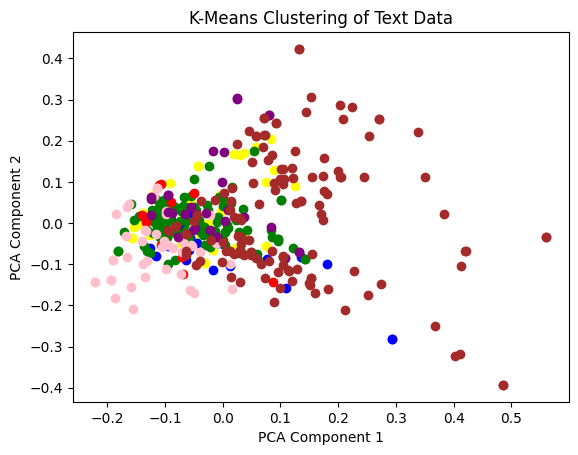

                                              abstract  cluster
0    Metamorphic testing is an approach to both tes...        6
1    Metamorphic testing is a well known approach t...        6
2    Background: Metamorphic testing emerges as a s...        2
3    Testing of bioinformatics software often suffe...        2
4    Over the past decade, metamorphic testing has ...        6
..                                                 ...      ...
431  Abstract: Most fault localisation techniques t...        1
432  Abstract: Context:\nPrevious studies proposed ...        6
433  Abstract: Fourier-transform infrared spectrosc...        2
434  Abstract: Compilers play a critical role in cu...        2
435  Abstract: This study aims to understand the re...        1

[432 rows x 2 columns]


In [69]:
df = abst[['abstract']]

# Step 1: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['abstract'])

# Step 2: Apply K-Means Clustering
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Step 3: Evaluate with Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Step 4: Visualize Clusters (Optional)
# Reduce dimensions for visualization using PCA or t-SNE

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())
colors = ['yellow', 'blue', 'green', 'red', 'pink', 'purple', 'brown']
for i in range(7):
    points = reduced_features[df['cluster'] == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Cluster {i + 1}')
# plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Print the resulting clusters
print(df)


/tmp/ipykernel_1286436/2620403567.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(X)


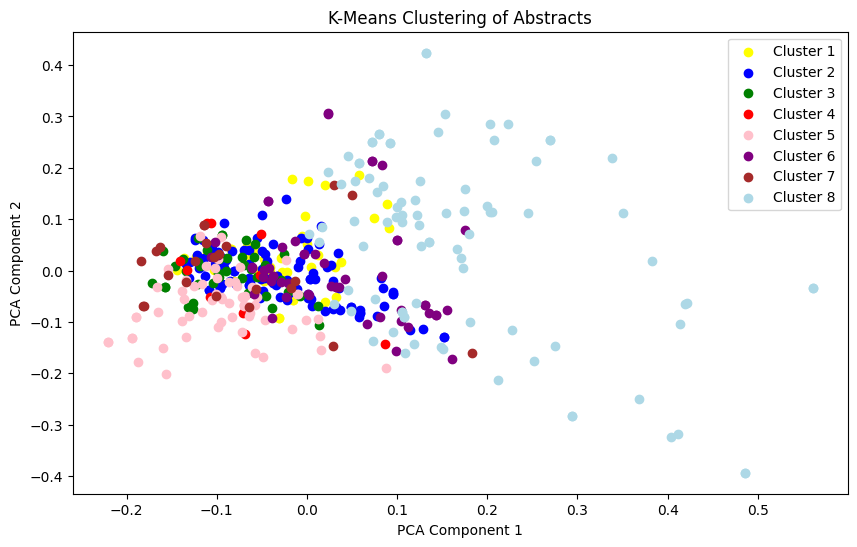

,abstract,cluster
0,Metamorphic testing is an approach to both tes...,5
1,Metamorphic testing is a well known approach t...,7
2,Background: Metamorphic testing emerges as a s...,2
3,Testing of bioinformatics software often suffe...,1
4,"Over the past decade, metamorphic testing has ...",7
...,...,...
431,Abstract: Most fault localisation techniques t...,4
432,Abstract: Context:\nPrevious studies proposed ...,7
433,Abstract: Fourier-transform infrared spectrosc...,4
434,Abstract: Compilers play a critical role in cu...,6


In [72]:
df =  abst[['abstract']]

# Step 1: Vectorize the abstracts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['abstract'])

# Step 2: Apply K-Means Clustering
kmeans = KMeans(n_clusters=8, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Step 3: Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())

# Step 4: Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['yellow', 'blue', 'green', 'red', 'pink', 'purple', 'brown', 'lightblue']
for i in range(8):
    points = reduced_features[df['cluster'] == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Cluster {i + 1}')

plt.title('K-Means Clustering of Abstracts')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

df


In [74]:
df['cluster'].value_counts()

cluster
1    110
7     89
4     62
5     53
0     44
2     41
6     23
3     10
Name: count, dtype: int64

## Agglomerative

/tmp/ipykernel_1286436/3855424347.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = agg_clustering.fit_predict(X.toarray())


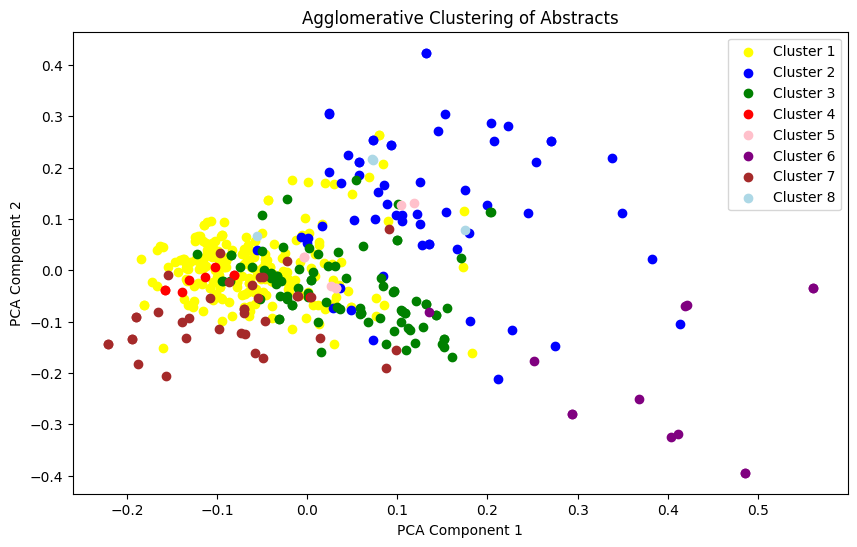

,abstract,cluster
0,Metamorphic testing is an approach to both tes...,2
1,Metamorphic testing is a well known approach t...,5
2,Background: Metamorphic testing emerges as a s...,0
3,Testing of bioinformatics software often suffe...,2
4,"Over the past decade, metamorphic testing has ...",5
...,...,...
431,Abstract: Most fault localisation techniques t...,0
432,Abstract: Context:\nPrevious studies proposed ...,0
433,Abstract: Fourier-transform infrared spectrosc...,0
434,Abstract: Compilers play a critical role in cu...,0


In [85]:

df =  abst[['abstract']]

# Step 1: Vectorize the abstracts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['abstract'])

# Step 2: Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=8)
df['cluster'] = agg_clustering.fit_predict(X.toarray())

# Step 3: Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())

# Step 4: Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['yellow', 'blue', 'green', 'red', 'pink', 'purple', 'brown', 'lightblue']
for i in range(8):
    points = reduced_features[df['cluster'] == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Cluster {i + 1}')

plt.title('Agglomerative Clustering of Abstracts')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

df